### Task 1 Implement Otsu's method
- Import image, display it in grayscale and its histogram
- Implement the threshold without using built-in function
- Write in markdown what formula you've used and what it does
- Use built-in function and compare result

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("./image/212657710_200x200.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (256, 256))

In [3]:
[m, n] = image.shape

print(f"Image shape: {m, n}")

Image shape: (256, 256)


### Step 1: Calculate the histogram of the image

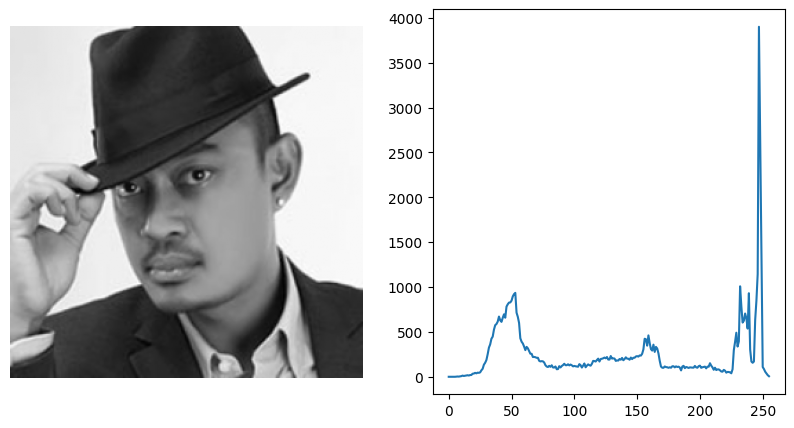

In [4]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

histogram = np.hstack(histogram)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.plot(histogram)
plt.show()

### Step 2: Calculate the probability distribution using the histogram
NOTE: Probability distribution is used to calculate the class probability (Background or Foreground)

$$Formula: pi = \frac{h(i)}{N}$$
Where _pi_ is the probability histogram, _h(i)_ is the histogram of a pixel intensity, and _N_ is the total number of pixel.



In [5]:
pi = histogram/np.sum(histogram)

### Step 3: Claculate the class probability for a class (Background or Foreground) and calculate the class mean
NOTE: Class probability represents the probability of a pixel being "background" or "foreground" and the class mean represents the average value for a specific class (background or foreground)
$$Formula: w(k) = \sum_{i=0}^{k} pi$$
where _w(k)_ is the class probability of a class and _k_ is the threshold value that divide the class into background or foreground.
$$Formula: \mu(k) = \sum_{i=0}^{k} i*pi$$
where $\mu(k)$ is the class mean and _i_ is the pixel range from _0 to 255_

In [6]:
k = 255

w = np.zeros(k+1)
mu = np.zeros(k+1)
Sum = 0

for i in range(k+1):
    w[i] = np.sum(pi[0:i+1])
    Sum = Sum + (i)*pi[i]
    mu[i] = Sum

# Total mean
mu_T = mu[-1]

### Step 4: Claculate the between class variance
NOTE: Our goal is find threshold _k_ that maximizes the between class variance
$$
Formula: \sigma_B^2(k) = \frac{[\mu_T \omega(k) - \mu(k)]^2}{\omega(k)[1 - \omega(k)]}
$$
where $\mu_T$ is the total mean

In [7]:
var_b = ((mu_T * w - mu) ** 2) / (w * (1 - w))

# Pick the threshold that maximized the class variance

Threshold = np.nanargmax(var_b)
print(f"Threshold: {Threshold}")

Threshold: 140


C:\Users\Angkor Computer\AppData\Local\Temp\ipykernel_19632\3831117716.py:1: RuntimeWarning: invalid value encountered in divide
  var_b = ((mu_T * w - mu) ** 2) / (w * (1 - w))


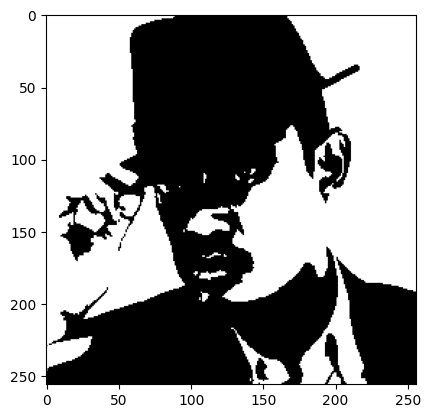

In [12]:
# Binarized image with the found threshold value

image_array = np.asarray(image)

thresh_image = np.where(image_array <= Threshold, 0, 255 )

plt.imshow(thresh_image, cmap="gray")

In [13]:
# Built-in Otsu's Method

def otsu_binarization(image):
    _, binary_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_otsu


Text(0.5, 1.0, 'No built-in function')

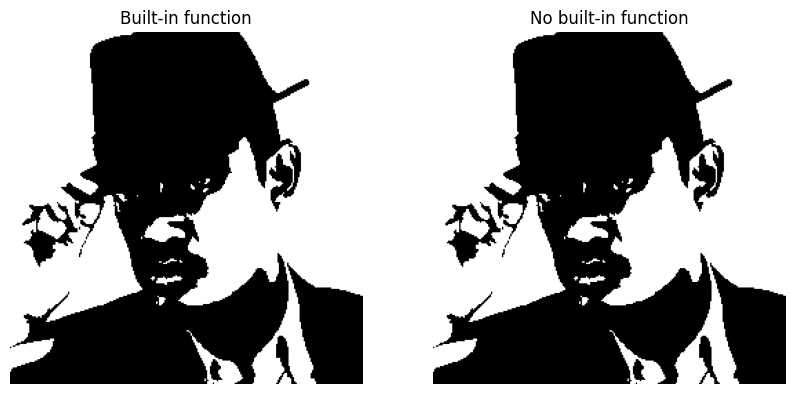

In [15]:
otsu_built_in = otsu_binarization(image)

figure = plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(otsu_built_in, cmap="gray")
plt.axis("off")
plt.title("Built-in function")

plt.subplot(1, 2, 2)
plt.imshow(thresh_image, cmap="gray")
plt.axis("off")
plt.title("No built-in function")


### Task 2: Use Prewit and Sobel Kernels
- Import an image without displaying it
- Create 2 kernel (one for prewit and one for sobel)
- Without using any built-in function, apply Prewit kernel to image and display 3 images (original, horizontal and vertical)
- Repreat step 3 with Sobel kernel

In [10]:
image_2 = cv2.imread("./image/212657710_200x200.jpg", cv2.IMREAD_COLOR)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

In [15]:
# Prewit kernel
prewit_h = np.array([[-1, -1, -1],
                    [0, 0, 0],
                    [1, 1, 1]])
prewit_v = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

# Sobel kernel
sobel_h = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
sobel_v = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

In [16]:
output_prewit_v = cv2.filter2D(image_2, ddepth = -1, kernel = prewit_v) # ddepth = -1 keep same depth as input
output_prewit_h = cv2.filter2D(image_2, ddepth = -1, kernel = prewit_h)
output_sobel_v = cv2.filter2D(image_2, ddepth = -1, kernel = sobel_v)
output_sobel_h = cv2.filter2D(image_2, ddepth = -1, kernel = sobel_h)

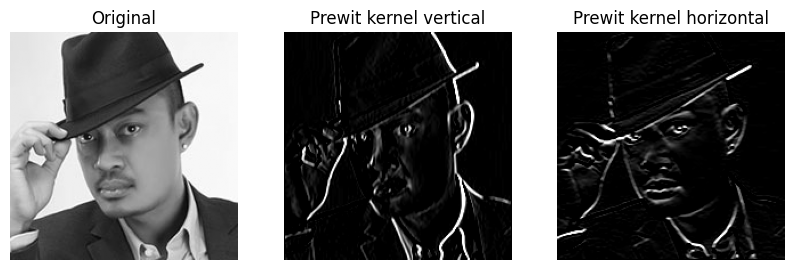

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(image_2, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(output_prewit_v, cmap="gray") 
axes[1].set_title("Prewit kernel vertical")
axes[1].axis("off")

axes[2].imshow(output_prewit_h, cmap="gray") 
axes[2].set_title("Prewit kernel horizontal")
axes[2].axis("off")

plt.show()

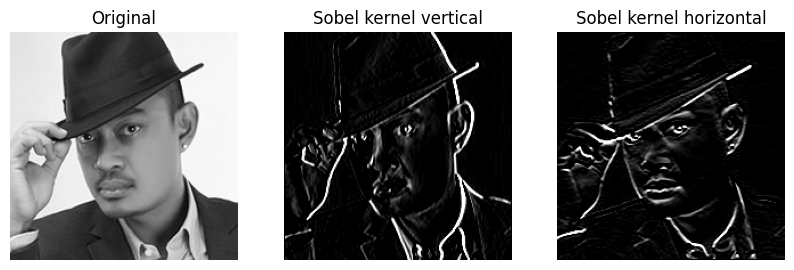

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(image_2, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(output_sobel_v, cmap="gray") 
axes[1].set_title("Sobel kernel vertical")
axes[1].axis("off")

axes[2].imshow(output_sobel_h, cmap="gray") 
axes[2].set_title("Sobel kernel horizontal")
axes[2].axis("off")

plt.show()

### Task 3: Run and Compare Result
- Use your work on edge detection using Laplacian from previous week
- Display six images in a figure (Original of 3, and each technique results)
- Tell what you notice about the difference between these 3 techniques

In [22]:
from skimage import io, color
import skimage as ski
cat = ski.data.chelsea()

# Convert to grayscale
cat = color.rgb2gray(cat)

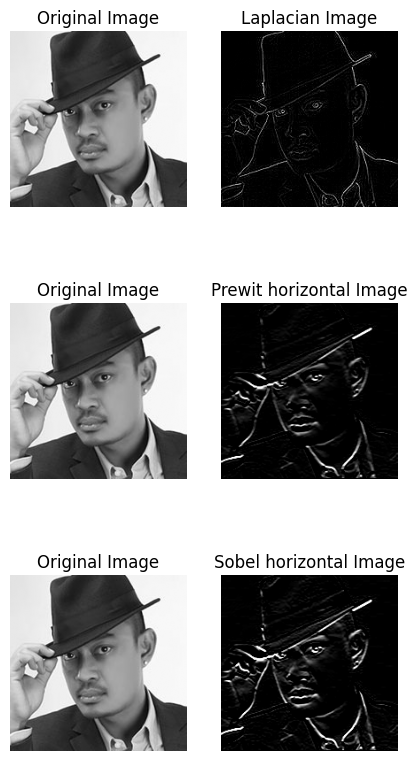

In [28]:
kernel = np.array( [[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

laplacian_image = cv2.filter2D(image_2, -1, kernel)
prewit_h_image = cv2.filter2D(image_2, -1, prewit_h)
sobel_h_image = cv2.filter2D(image_2, -1, sobel_h)


fig, axes = plt.subplots(3, 2, figsize=(5, 10))

axes[0, 0].imshow(image_2, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(laplacian_image, cmap="gray") 
axes[0, 1].set_title("Laplacian Image")
axes[0, 1].axis("off")

axes[1, 0].imshow(image_2, cmap="gray") 
axes[1, 0].set_title("Original Image")
axes[1, 0].axis("off")

axes[1, 1].imshow(prewit_h_image, cmap="gray") 
axes[1, 1].set_title("Prewit horizontal Image")
axes[1, 1].axis("off")

axes[2, 0].imshow(image_2, cmap="gray") 
axes[2, 0].set_title("Original Image")
axes[2, 0].axis("off")

axes[2, 1].imshow(sobel_h_image, cmap="gray") 
axes[2, 1].set_title("Sobel horizontal Image")
axes[2, 1].axis("off")

plt.show()

The laplacian techniques was able to capture the outline edges of image, specifically when the image pixel intensity changes intensely.
The prewitt techniques was able to capture most horizontal edges, but it is not as refined and clear as sobel.